# WGU D208 TASK 1 REV 1 - MATTINSON

4030.5.1 : Multiple Regression

The graduate employs multiple regression algorithms with categorical and numerical predictors in describing phenomena.

4030.5.3 : Regression Implications

The graduate makes assertions based on regression modeling.

In [1]:
# import required packages
import sys
import os
import pandas as pd 

# math and stats
import numpy as np 
import scipy.stats as stats
import math
import statsmodels.api as sm

# plot
import matplotlib.pyplot as plt

# analysis using sklearn and seaborn
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# show python environment
print(sys.version)
print(sys.executable)

3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]
w:\workspace-wgu\D208_task1_py\venv\Scripts\python.exe


In [3]:
# read csv file
df = pd.read_csv(os.path.join('data','churn_clean.csv'))
print(df.columns.to_series().groupby(df.dtypes).groups)
print(df.shape)

{int64: ['CaseOrder', 'Zip', 'Population', 'Children', 'Age', 'Email', 'Contacts', 'Yearly_equip_failure', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], float64: ['Lat', 'Lng', 'Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'], object: ['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']}
(10000, 50)


In [4]:
# drop unwanted cols
to_drop = ['City','County','Zip','Job','TimeZone', 'State', 'Churn', 
            'Lat', 'Lng', 'UID', 'Customer_id','Interaction', 'CaseOrder',
            'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']
df.drop(columns = to_drop, inplace = True)


In [5]:
# move target to end
target = 'MonthlyCharge'
df = df[ [target] + [ col for col in df.columns if col != target ] ]
df.columns

Index(['MonthlyCharge', 'Population', 'Area', 'Children', 'Age', 'Income',
       'Marital', 'Gender', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'Bandwidth_GB_Year'],
      dtype='object')

In [6]:
# show column names grouped by dtype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Population', 'Children', 'Age', 'Email', 'Contacts', 'Yearly_equip_failure'], float64: ['MonthlyCharge', 'Income', 'Outage_sec_perweek', 'Tenure', 'Bandwidth_GB_Year'], object: ['Area', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']}

In [7]:
# show column names for numeric data
num_cols = df.select_dtypes(include="number").columns
num_cols

Index(['MonthlyCharge', 'Population', 'Children', 'Age', 'Income',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'Bandwidth_GB_Year'],
      dtype='object')

In [8]:
# standardize numeric data
df[num_cols] = (df[num_cols] - df[num_cols].mean())/df[num_cols].std()

In [9]:
# show column names for categorical data
cat_cols = df.select_dtypes(include="object").columns
cat_cols

Index(['Area', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [10]:
# create dataframe of predictor variables
predictor_variables = data.columns
predictor_df = data[predictor_variables]
predictor_df.drop(target, axis=1, inplace=True)

# convert dummy variables
predictor_df = pd.get_dummies(predictor_df, drop_first=True)
predictor_df.columns.to_series().groupby(predictor_df.dtypes).groups

NameError: name 'data' is not defined

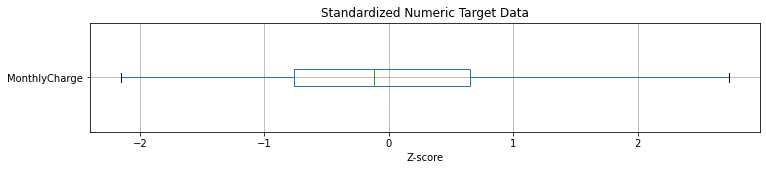

count    10000.000
mean        -0.000
std          1.000
min         -2.157
25%         -0.760
50%         -0.120
75%          0.655
max          2.737
Name: MonthlyCharge, dtype: float64


In [ ]:
# describe standardized target data
plt.figure(figsize=(12, 2))
ax = df.boxplot([target], vert=False)
plt.title('Standardized Numeric Target Data')
plt.xlabel('Z-score')
plt.savefig('box_std_target.png', facecolor='w')
plt.show()
print(df[target].describe().round(3))

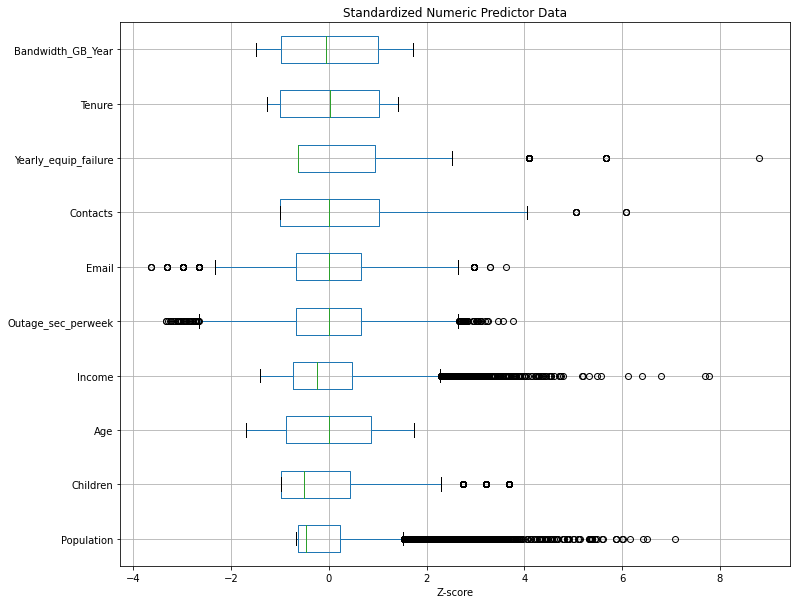

                        count  mean  std    min    25%    50%    75%    max
Population            10000.0  -0.0  1.0 -0.676 -0.625 -0.474  0.236  7.074
Children              10000.0   0.0  1.0 -0.972 -0.972 -0.507  0.425  3.685
Age                   10000.0  -0.0  1.0 -1.695 -0.873 -0.004  0.866  1.735
Income                10000.0   0.0  1.0 -1.399 -0.730 -0.235  0.477  7.769
Outage_sec_perweek    10000.0   0.0  1.0 -3.327 -0.667  0.006  0.661  3.765
Email                 10000.0  -0.0  1.0 -3.641 -0.666 -0.005  0.656  3.630
Contacts              10000.0   0.0  1.0 -1.006 -1.006  0.006  1.018  6.076
Yearly_equip_failure  10000.0   0.0  1.0 -0.626 -0.626 -0.626  0.947  8.809
Tenure                10000.0   0.0  1.0 -1.268 -1.006  0.034  1.019  1.417
Bandwidth_GB_Year     10000.0   0.0  1.0 -1.481 -0.987 -0.052  1.004  1.724


In [ ]:
# describe and boxplot standardized numeric data
plt.figure(figsize=(12, 10))
pred_cols = df[num_cols].columns[1:]
ax = df[pred_cols].boxplot(vert=False)
plt.title('Standardized Numeric Predictor Data')
plt.xlabel('Z-score')
plt.savefig('box_std_num_data.png', facecolor='w')
plt.show()
print(df[pred_cols].describe().round(3).T)


<Figure size 720x1440 with 0 Axes>

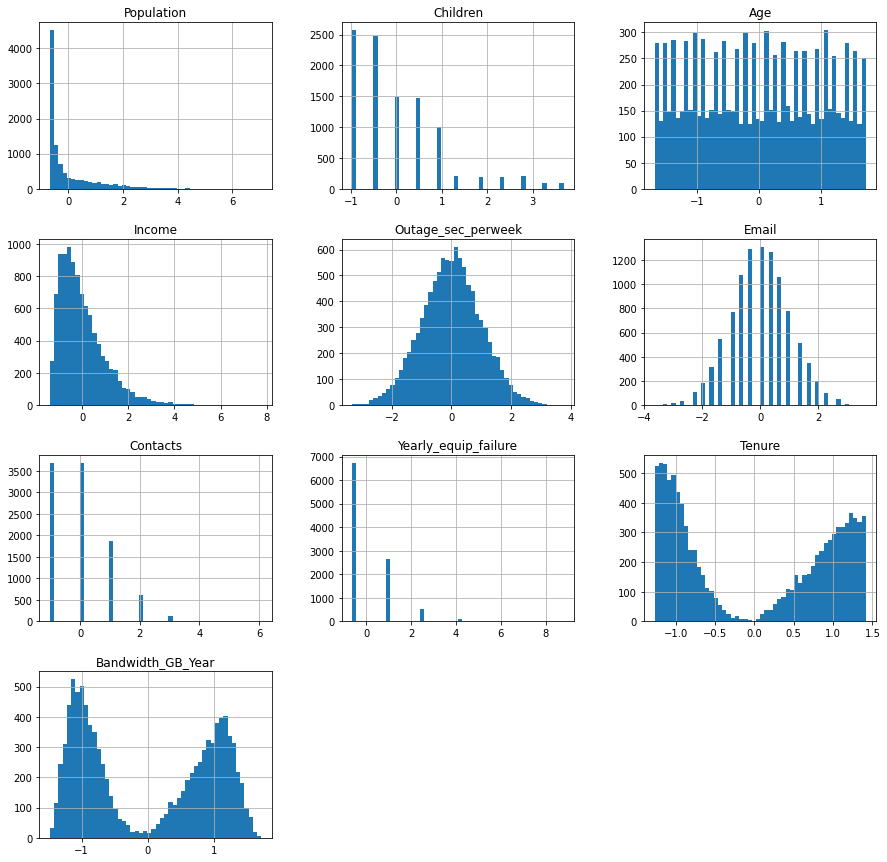

In [ ]:
# histogram plot standardized numeric data
fig = plt.figure(figsize=(10, 20))
ax = df[pred_cols].hist(bins = 50, figsize=(15,15))
fig.tight_layout(h_pad=5, w_pad=5)
plt.savefig('hist_std_num_data.png', facecolor='w')
plt.show()

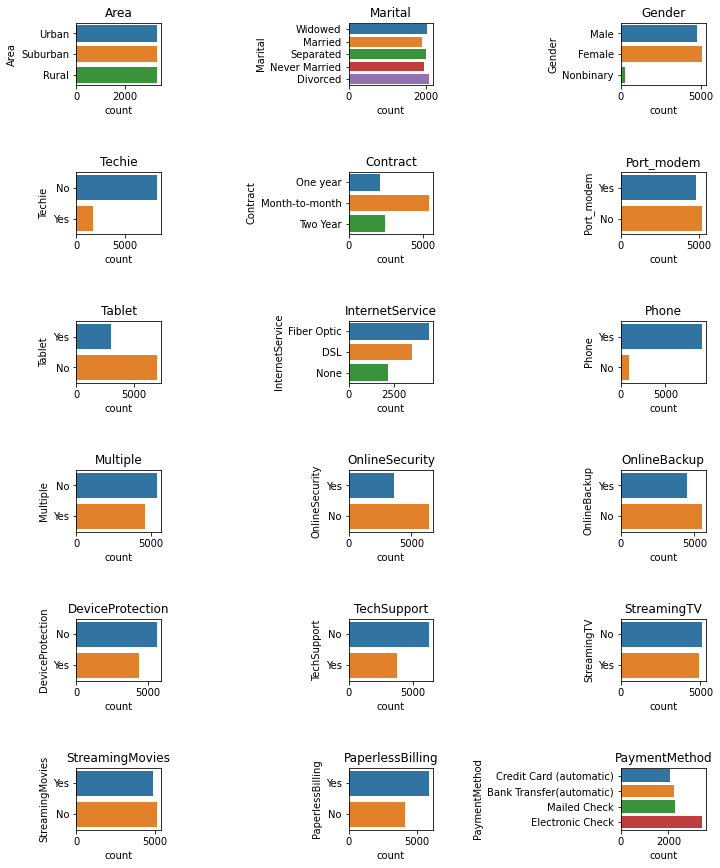

In [ ]:
# count plot of categorical data
fig = plt.figure(figsize=(10, 20))

for i, col in enumerate(cat_cols):
    plt.subplot(10, 3, i+1)
    ax = sns.countplot(y=col, data=df)
    plt.title(col)
    fig.tight_layout(h_pad=4, w_pad=4)

plt.savefig('countplot_cat_data.png', facecolor='w')


$$c = \sqrt{a^2 + b^2}$$

<AxesSubplot:>

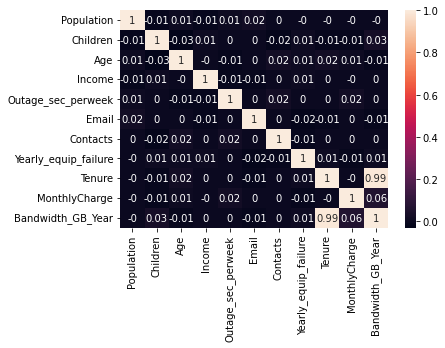

In [ ]:
# create correlation matrix
correlation_matrix = data.select_dtypes(include="number").corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# example of coded latex math equation
from IPython.display import display, Math, Latex
display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))

<IPython.core.display.Math object>

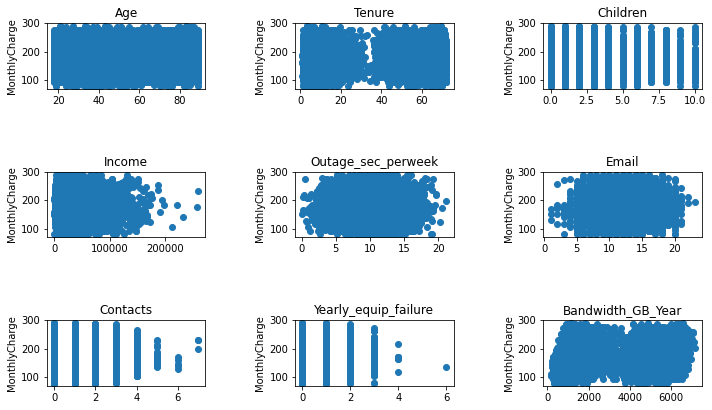

In [ ]:
# hist plot of numeric data
fig = plt.figure(figsize=(10, 20))
features = ['Age','Tenure','Children','Income',
            'Outage_sec_perweek','Email','Contacts',
            'Yearly_equip_failure','Bandwidth_GB_Year']
target = data['MonthlyCharge']

for i, col in enumerate(features):
    plt.subplot(10, 3, i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    #plt.xlabel(col)
    plt.ylabel('MonthlyCharge')
    fig.tight_layout(h_pad=5, w_pad=5)

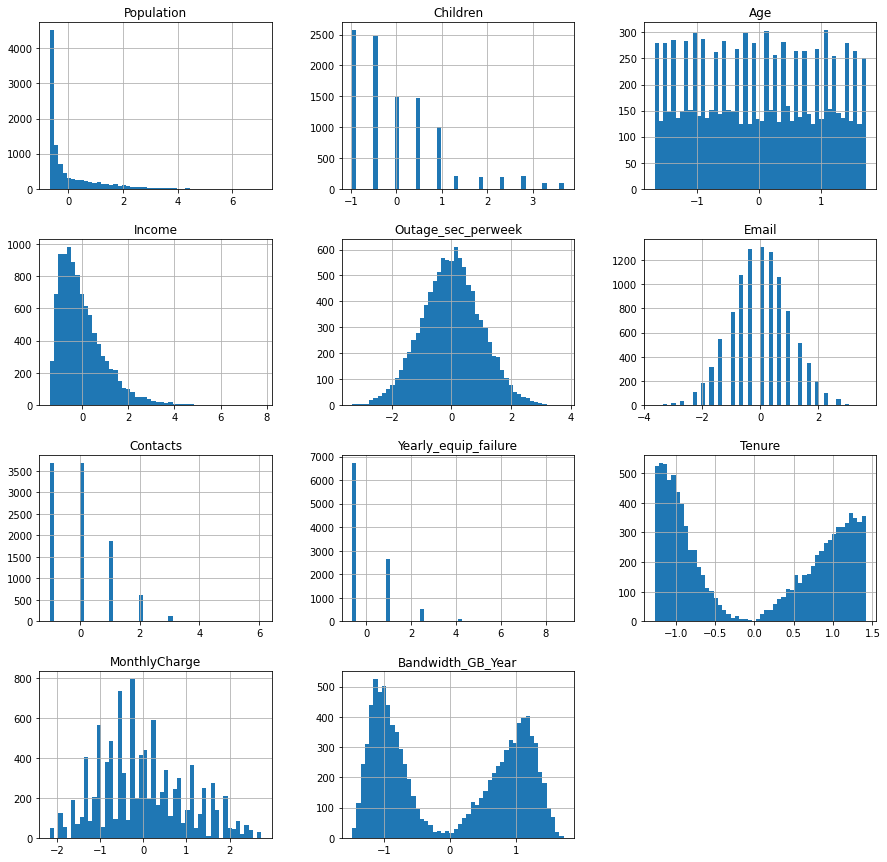

In [ ]:
# standardize and replot numeric data
num = data.select_dtypes(include="number")
std = (num - num.mean()) / num.std()
ax = std.hist(bins = 50, figsize=(15,15))
plt.show()

In [ ]:
# force stop
ptd.xls()

NameError: name 'ptd' is not defined

In [ ]:
# create data visualizations
ax = sns.pairplot(data.select_dtypes(include="number"))
plt.show()

In [ ]:
# scatter plot of all numeric predictor variables
plt.figure(figsize=(15, 10))
features = ['Age','Tenure','Children','Income',
            'Outage_sec_perweek','Email','Contacts',
            'Yearly_equip_failure','Bandwidth_GB_Year']
target = data['MonthlyCharge']

for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    #plt.xlabel(col)
    plt.ylabel('MonthlyCharge')

In [ ]:
# initial model
y = data['MonthlyCharge']
X = predictor_df.select_dtypes(include="number")
X = (X - X.min()) / (X.max() - X.min()) 
Xc = sm.add_constant(X)
model_1 = sm.OLS(y, Xc).fit()
print(model_1.summary2())

In [ ]:
# create correlation matrix
correlation_matrix = predictor_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# print out of highest values in the correlation matrix
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(predictor_df))

In [ ]:
# create correlation matrix
correlation_matrix = predictor_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# automatically drop cols if p > 0.05
equation = model_1.summary2().tables[1]
for i in equation.itertuples():
    #print(i[0], i[1], i[2], i[3], i[4])
    if i[4] > 0.05:
        # drop col
        predictor_df.drop(columns = [i[0]], inplace = True)

# also drop Bandwidth_GB_Year due to high multicollinearity with Tenure
predictor_df.drop(columns = ['Bandwidth_GB_Year'], inplace = True)
print(predictor_df.columns)

In [ ]:
# updated model 
y = data['MonthlyCharge']
X = predictor_df.select_dtypes(include="number")
X = (X - X.min()) / (X.max() - X.min()) 
Xc = sm.add_constant(X)
model_2 = sm.OLS(y, Xc).fit()
print(model_2.summary())

In [ ]:
# equation of the regression line/plane
print('Adj. R-squared: {}'.format(model_2.summary2().tables[0][3][0]))
equation = model_2.summary2().tables[1]
print('Estimate [{}] as y = '.format(model_2.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.2f} x ( {} ) '.format(i[1],i[0]))

In [ ]:
# print out of highest values in the correlation matrix
print("Top Absolute Correlations")
print(get_top_abs_correlations(predictor_df))

In [ ]:
# create correlation matrix
correlation_matrix = predictor_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# opted to leave the remaining numerical values 
# even with their high p-values

# drop columns with high multicollinearity
predictor_df.drop(columns = ['InternetService_None'], inplace = True)
print(predictor_df.columns)

In [ ]:
# final model 
y = data['MonthlyCharge']
X = predictor_df
X = (X - X.min()) / (X.max() - X.min()) 
Xc = sm.add_constant(X)
model_3 = sm.OLS(y, Xc).fit()
print(model_3.summary())

In [ ]:
# equation of the regression line/plane
print('Adj. R-squared: {}'.format(model_3.summary2().tables[0][3][0]))
equation = model_3.summary2().tables[1]
print('Estimate [{}] as y = '.format(model_3.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.2f} x ( {} ) '.format(i[1],i[0]))